In [161]:
import pandas as pd
import numpy as np

X_tr = np.loadtxt('X_train.txt', delimiter=' ')
Y_tr = np.loadtxt('y_train.txt')
train_size = int(X_tr.shape[0]*0.8)
X_train = X_tr[0:train_size]
Y_train = Y_tr[0:train_size]
X_val = X_tr[train_size:]
Y_val = Y_tr[train_size:]

X_test = np.loadtxt('X_test.txt', delimiter=' ')
Y_test = np.loadtxt('y_test.txt')

print(Y_test)

[5. 5. 5. ... 2. 2. 2.]


In [189]:
global svm_pred
global knn_pred
global dt_pred
global rf_pred

In [309]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

def build_classifiers(x_train, y_train):
        result = {}
        lsvm_clf = svm.SVC()
        lsvm_clf.fit(X_train,Y_train)
        result['svm'] = lsvm_clf
        
        knn_clf = KNeighborsClassifier()
        knn_clf.fit(X_train, Y_train)
        result['knn'] = knn_clf
        
        dtc_clf = DecisionTreeClassifier()
        dtc_clf = dtc_clf.fit(X_train,Y_train)
        result['dtc'] = dtc_clf
        
        crf_clf = RandomForestClassifier()
        crf_clf.fit(X_train, Y_train)
        result['rf'] = crf_clf
        return result
    
classifiers = build_classifiers(X_train, Y_train)

In [310]:
def build_predictions(classifiers, x_test):
    result = {}
    for classifier in classifiers:
        result[classifier] = classifiers[classifier].predict(x_test)
    return result

predictions = build_predictions(classifiers, X_test)

In [235]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn

def show_confusion_matrix(name, y_test, y_pred):
    print(name,' confusion matrix:')
    cm = confusion_matrix(y_test, y_pred)
    seaborn.set(font_scale=1.4)
    seaborn.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues')
    plt.show()

svm  confusion matrix:


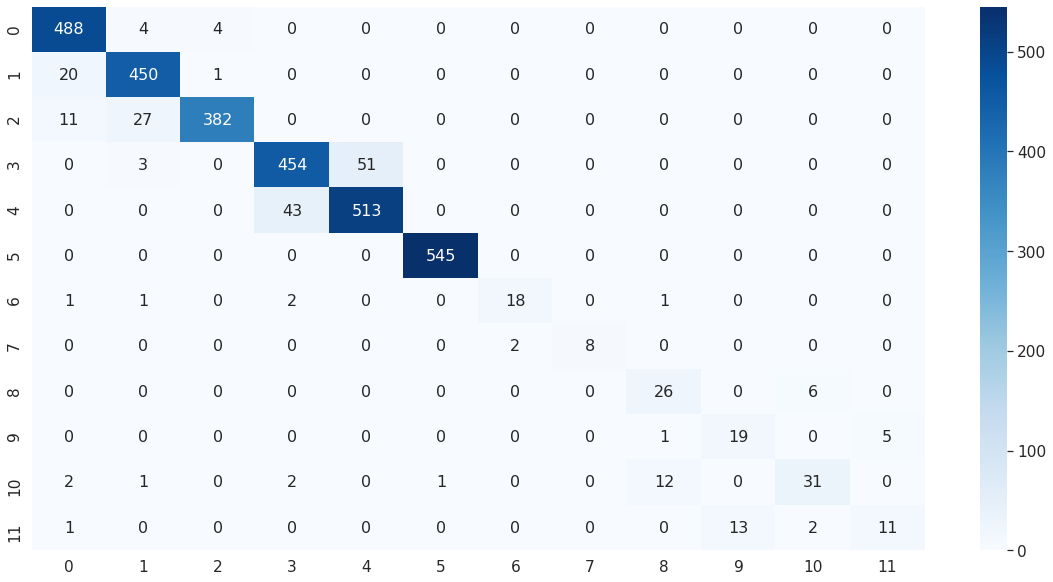

knn  confusion matrix:


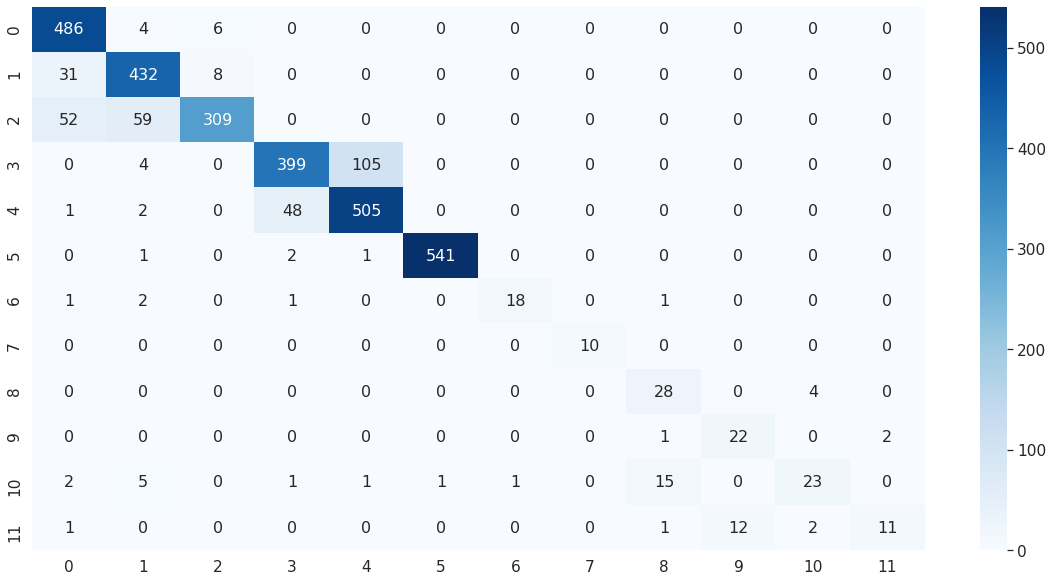

In [311]:
show_confusion_matrix('svm',Y_test, predictions['svm'])
show_confusion_matrix('knn',Y_test, predictions['knn'])

dtc  confusion matrix:


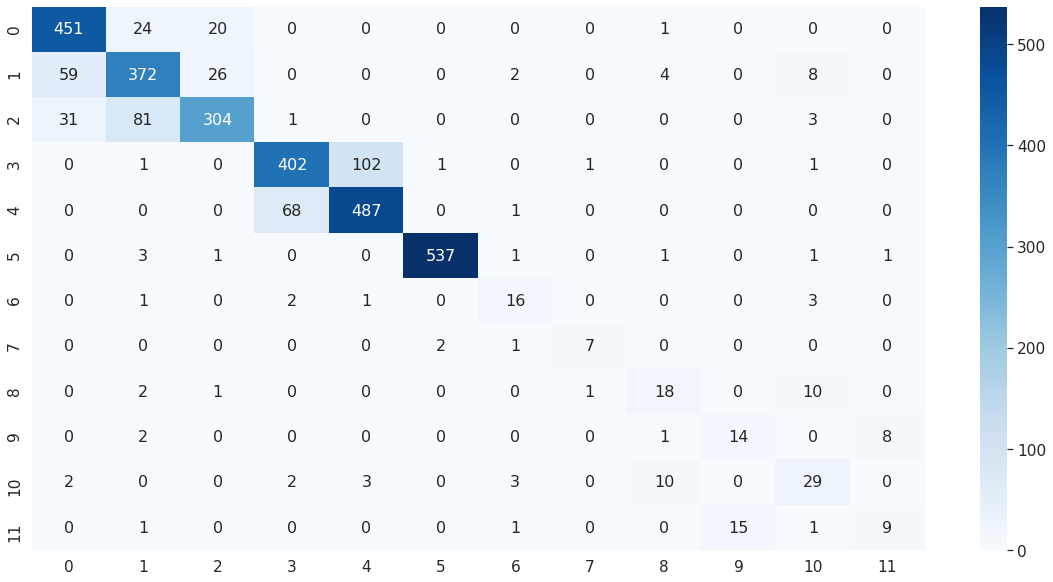

rf  confusion matrix:


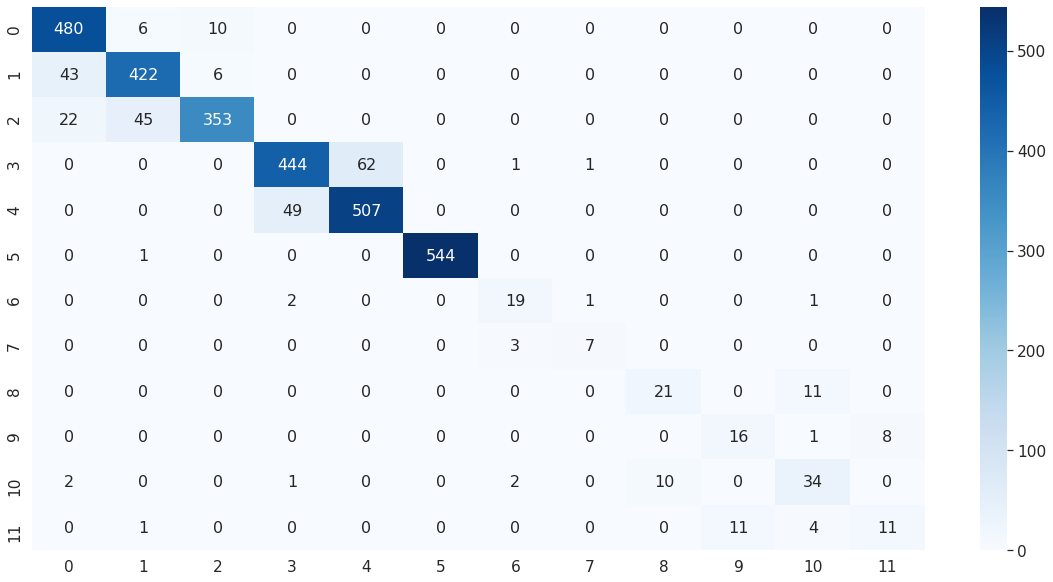

In [313]:
show_confusion_matrix('dtc',Y_test, predictions['dtc'])
show_confusion_matrix('rf',Y_test, predictions['rf'])

In [315]:
#ACC - accurancy score
from sklearn.metrics import accuracy_score

for pred in predictions:
    print("{} accuracy: {}".format(pred, accuracy_score(Y_test, predictions[pred])))

svm accuracy: 0.9313725490196079
knn accuracy: 0.8804554079696395
dtc accuracy: 0.8368121442125237
rf accuracy: 0.9038583175205566


In [316]:
# recall score
from sklearn.metrics import recall_score

def show_recall_score(average='micro'):
    print('\nrecall score for average: ', average)
    for pred in predictions:
        print("{} recall: {}".format(pred, recall_score(Y_test, predictions[pred], average=average)))
    

show_recall_score()
show_recall_score('macro')


recall score for average:  micro
svm recall: 0.9313725490196079
knn recall: 0.8804554079696395
dtc recall: 0.8368121442125237
rf recall: 0.9038583175205566

recall score for average:  macro
svm recall: 0.8216950510161535
knn recall: 0.811126775700204
dtc recall: 0.7098978200554796
rf recall: 0.784321454989742


In [317]:
# f1 score
from sklearn.metrics import f1_score

def show_f1_score(average='micro'):
    print('\nf1 score for average: ', average)
    for pred in predictions:
        print("{} f1 score: {}".format(pred, f1_score(Y_test, predictions[pred], average=average)))
    

show_f1_score()
show_f1_score('macro')


f1 score for average:  micro
svm f1 score: 0.9313725490196079
knn f1 score: 0.8804554079696395
dtc f1 score: 0.8368121442125237
rf f1 score: 0.9038583175205566

f1 score for average:  macro
svm f1 score: 0.8325977535631431
knn f1 score: 0.8145539889084653
dtc f1 score: 0.7082922177832772
rf f1 score: 0.7884250944413052


In [319]:
# AUC score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

def show_roc_auc_score():
    for pred in predictions:
        print("{} AUC score: {}".format(pred, multiclass_roc_auc_score(Y_test, predictions[pred])))
    

show_roc_auc_score()

svm AUC score: 0.9075387757925567
knn AUC score: 0.8997207948113851
dtc AUC score: 0.8470599413719784
rf AUC score: 0.88752296832387


In [321]:
#model selection
from sklearn.model_selection import cross_val_score

def build_cross_val_scores(classifiers, x_train,y_train):
    result = {}
    for classificator in classifiers:
        result[classificator] = cross_val_score(classifiers[classificator], x_train, y_train, cv=5)
        print(classificator, 'score :', result[classificator])
    return result

scores = build_cross_val_scores(classifiers, X_train, Y_train)

svm score : [0.93724859 0.92196299 0.85518906 0.92914654 0.92351047]
knn score : [0.88012872 0.86323411 0.78921963 0.88888889 0.87520129]
dtc score : [0.86323411 0.83829445 0.77232502 0.82045089 0.784219  ]
rf score : [0.8921963  0.90667739 0.85197104 0.91062802 0.85748792]


In [325]:
#avg cross val score classification:
print('Classification by average:')
avg_results = {
    'svm':np.mean(scores['svm']),
    'knn':np.mean(scores['knn']),
    'dtc':np.mean(scores['dtc']),
    'rf':np.mean(scores['rf'])
}
print(avg_results)
print('Best result: ', max(avg_results, key=avg_results.get))

Classification by average:
{'svm': 0.9134115296870202, 'knn': 0.8593345277839314, 'dtc': 0.8157046934653707, 'rf': 0.8837921345039467}
Best result:  svm


In [326]:
#std cross val score classification:
print('Classification by standard deviation along the scores:')
std_results = {
    'svm':np.std(scores['svm']),
    'knn':np.std(scores['knn']),
    'dtc':np.std(scores['dtc']),
    'rf':np.std(scores['rf'])
}
print(std_results)
print('Best result: ', min(std_results, key=std_results.get))

Classification by standard deviation along the scores:
{'svm': 0.029599892589850428, 'knn': 0.03602476499129995, 'dtc': 0.033660106288247414, 'rf': 0.024572437923386762}
Best result:  rf
